# Analysis 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# File to Load (Remember to change these)
city_file = "data/city_data.csv"
ride_file = "data/ride_data.csv"

# Read the City and Ride Data
city_data = pd.read_csv(city_file)
ride_data =pd.read_csv(ride_file)

# Combine the data into a single dataset
combine_data = pd.merge(ride_data,city_data, on = 'city', how = 'left')

# Display the data table for preview
combine_data.head()

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2018-01-14 10:14:22,13.83,5739410935873,5,Urban
1,South Michelleport,2018-03-04 18:24:09,30.24,2343912425577,72,Urban
2,Port Samanthamouth,2018-02-24 04:29:00,33.44,2005065760003,57,Urban
3,Rodneyfort,2018-02-10 23:22:03,23.44,5149245426178,34,Urban
4,South Jack,2018-03-06 04:28:35,34.58,3908451377344,46,Urban


## Bubble Plot of Ride Sharing Data

In [2]:
#define a function to obtain data for bubble plot
def get_coordinates(city_data):
    y = []
    x = []
    size = []
    result = []
    cities = city_data['city'].unique()
    for city in cities:
        driver = city_data[city_data['city'] == city]['driver_count']
        fare_data = city_data[city_data['city'] == city]['fare']
        total_fare = sum(fare_data)
        avg_fare = total_fare/len(fare_data)
        x.append(len(fare_data))
        y.append(avg_fare)
        size.append(int(driver.sum()/len(driver))*10)
    result.append(x) 
    result.append(y)
    result.append(size)
    return result

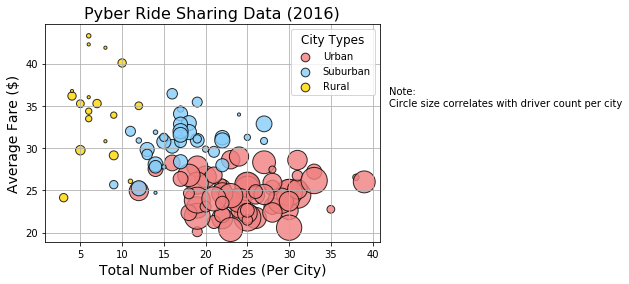

In [3]:
# Obtain the x and y coordinates for each of the three city types
urban_dataFrame = combine_data[combine_data['type']=='Urban']
suburban_dataFrame = combine_data[combine_data['type']=='Suburban']
rural_dataFrame = combine_data[combine_data['type']== 'Rural']

#Getting coordinates 
urban_coord = get_coordinates(urban_dataFrame)
suburban_coord = get_coordinates(suburban_dataFrame)
rural_coord = get_coordinates(rural_dataFrame)

# Build the scatter plots for each city types
plt.scatter(urban_coord[0],urban_coord[1],s=urban_coord[2],alpha= 0.8, color = 'lightcoral',edgecolor = 'black')
plt.scatter(suburban_coord[0],suburban_coord[1],s=suburban_coord[2],alpha= 0.8, color = 'lightskyblue',edgecolor = 'black')
plt.scatter(rural_coord[0],rural_coord[1],s=rural_coord[2],alpha= 0.8, color = 'gold',edgecolor = 'black')
plt.grid()

#Title 
plt.title('Pyber Ride Sharing Data (2016)',size = 16)
plt.xlabel('Total Number of Rides (Per City)',size = 14)
plt.ylabel('Average Fare ($)',size = 14)

# Create a legend
leged = plt.legend(['Urban','Suburban','Rural'], title = 'City Types')
plt.setp(leged.get_title(),fontsize='large')
leged.legendHandles[0]._sizes = [75]
leged.legendHandles[1]._sizes = [75]
leged.legendHandles[2]._sizes = [75]

# Incorporate a text label regarding circle size
plt.text(42,35,"Note:\nCircle size correlates with driver count per city")

# Save Figure
plt.savefig('save_figures/2016_Pyber_Bubble_plot.png')

## Total Fares by City Type

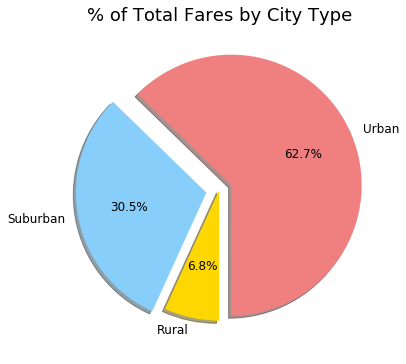

In [4]:
# Calculate Type Percents
fare_list = [urban_dataFrame['fare'].sum(), suburban_dataFrame['fare'].sum(), rural_dataFrame['fare'].sum()]
labels = combine_data['type'].unique()
colors = ['lightcoral', 'lightskyblue', 'gold']
# Build Pie Chart
fig, ax = plt.subplots(figsize=(10, 6))
explode = [0.1 , 0.1, 0]

ax.pie(fare_list, autopct = "%1.1f%%", labels=labels, explode= explode, startangle = 270, shadow = True, colors = colors, textprops={'fontsize':12})
ax.set_title("% of Total Fares by City Type", {'fontsize': 18})

# Save Figure
plt.savefig('save_figures/Total Fare % by City Type.png')

## Total Rides by City Type

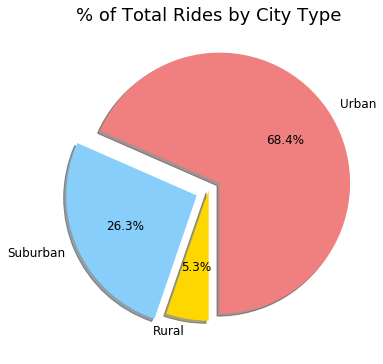

In [5]:
# Calculate Rides Percents
ride_list = [len(urban_dataFrame['ride_id']), len(suburban_dataFrame['ride_id']), len(rural_dataFrame['ride_id'])]
labels = combine_data['type'].unique()
colors = ['lightcoral', 'lightskyblue', 'gold']

# Build Pie Chart
fig, ax = plt.subplots(figsize=(10, 6))
explode = [0.1 , 0.1, 0]

ax.pie(ride_list, autopct = "%1.1f%%", labels=labels, explode= explode, startangle = 270, shadow = True, colors = colors, textprops={'fontsize':12})
ax.set_title("% of Total Rides by City Type", {'fontsize': 18})

# Save Figure

plt.savefig('save_figures/Total Rides % .png')

## Total Drivers by City Type

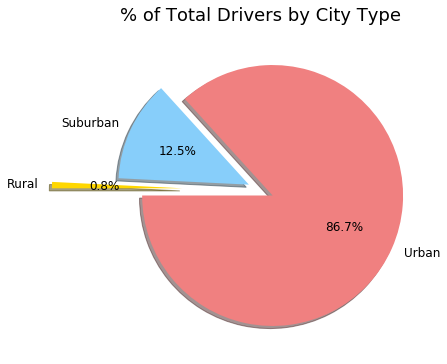

In [6]:
# Calculate Driver Percents
driver_list = [urban_dataFrame['driver_count'].sum(), suburban_dataFrame['driver_count'].sum(), rural_dataFrame['driver_count'].sum()]
labels = combine_data['type'].unique()
colors = ['lightcoral', 'lightskyblue', 'gold']
# Build Pie Chart
fig, ax = plt.subplots(figsize=(10, 6))
explode = [0.1 , 0.1, 0.6]

ax.pie(driver_list, autopct = "%1.1f%%", labels=labels, explode= explode, startangle = 180, shadow = True, colors = colors, textprops={'fontsize':12})
ax.set_title("% of Total Drivers by City Type", {'fontsize': 18})

# Save Figure
plt.savefig('save_figures/Total Drivers % by City Type.png')